In [1]:
import sys
sys.path.insert(0, '../../gaps_topology/Tilings') # prepend the path to the Tilings package
import Tilings as tl
import AB_envs as envs
import Penrose_envs as Penrose_envs
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines # for legends

# interactivity in the notebook
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

# replace inline by %matplotlib notebook for full interactivity (but beware of the flickering!)
%matplotlib inline

"""
Styling
See: http://matplotlib.org/users/customizing.html

TeX rendering:
You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache
"""
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern'], 'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# colors
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255
# linewidth of plots
rc('lines', lw = 2)
# fontsize of the labels
rc('axes', labelsize = 16)
# bbox='tight' tries to make the bounding box fit the plot area
# pad_inches is the distance between the bounding box and the plot area
# see http://matplotlib.org/users/tight_layout_guide.html
rc('savefig', bbox = 'tight', pad_inches = .1)

# Ammann-Beenker

In [2]:
ninfl = 3
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)

approx.draw((200,200), 1., (0,0), "../img0/tiling")
approx.save_image()

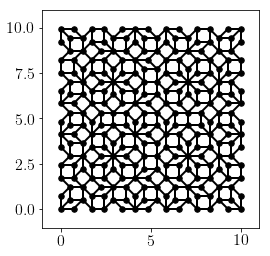

In [3]:
"""
Plot
"""

def html(rgb_tuple):
    """ convert an (R, G, B) tuple to #RRGGBB """
    hexcolor = '#%02x%02x%02x' % tuple([int(255*val) for val in rgb_tuple])
    # that's it! '%02x' means zero-padded, 2-digit hex values
    return hexcolor


ninfl = 3
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)

# retrive position
pos = nx.get_node_attributes(approx._graph, "para")
# projection matrix
para = approx.para()
# basis vectors
e = np.eye(4)
# node size and edge size
s = 30.
lw = 2.
fig, ax = plt.subplots(1, 1)
nx.draw_networkx(approx._graph, pos, with_labels=False,
                 node_size=s, width=lw, edge_color=html((0.,0.,0.)), node_color='black', alpha=1., ax=ax)

# x0, y0 = 0, 0
# L = 20
# ax.set_xlim([x0,x0+L])
# ax.set_ylim([y0,y0+L])
ax.set_aspect('equal')

fig.savefig("../img0/AB_plot.pdf")

# Inflation of the tiles

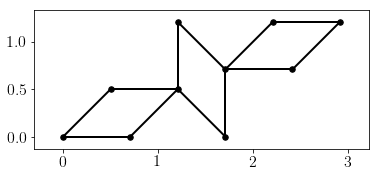

In [8]:
e = np.identity(4)
ninfl = 1
approx = tl.A5(envs.loz0(np.zeros(4), e[0], e[1]))
approx.it_sub(ninfl)

# retrive position
pos = nx.get_node_attributes(approx._graph, "para")
# projection matrix
para = approx.para()
# basis vectors
e = np.eye(4)
# node size and edge size
s = 30.
lw = 2.
fig, ax = plt.subplots(1, 1)
nx.draw_networkx(approx._graph, pos, with_labels=False,
                 node_size=s, width=lw, edge_color=html((0.,0.,0.)), node_color='black', alpha=1., ax=ax)

ax.set_aspect('equal')

fig.savefig("../img0/AB_plot.pdf")

# Successive inflations

In [4]:
"""
Inflation of the square
"""
ninfl = 0
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)
approx.draw((200,200), 1., (0,0), "../img0/square0")
approx.save_image()
# after 1 inflation
approx.it_sub(ninfl+1)
approx.draw((200,200), 1., (0,0), "../img0/square1")
approx.save_image()

"""
Inflation of the lozenge
"""
del approx
ninfl = 0
approx = tl.A5(envs.loz0(0*envs.e[0], envs.e[0], envs.e[1]))
approx.it_sub(ninfl)
approx.draw((200,200), 1., (0,0), "../img0/loz0")
approx.save_image()
# after 1 inflation
approx.it_sub(ninfl+1)
approx.draw((200,200), 1., (0,0), "../img0/loz1")
approx.save_image()

# Big approximant

In [3]:
ninfl = 3
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)
approx.draw((200,200), 1., (0,0), "../img0/AB_tiling")
approx.save_image()

# Lift

In [4]:
def subgraph(graph, in_region):
    """
    Return the subgraph containing the nodes in a given region in physical space.
    """
    pos = nx.get_node_attributes(graph, "para")
    selected_nodes = [p for p in pos if in_region(pos[p])]
    return nx.subgraph(graph, selected_nodes)

L = 4.5
tau = 1.5#(1.+np.sqrt(5))*0.5
r0 = np.array([0., -.3])
def in_region(r):
    """
    True is point r is in the region.
    """
    return r0[0] <= r[0] <= r0[0] + L and r0[1] <= r[1] <= r0[1] + L/tau

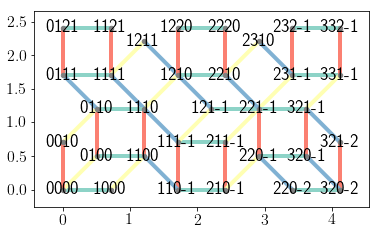

In [7]:
"""
Test that Penrose is correctly lifted to 5D
"""
# inflate
ninfl = 4
approx = tl.A5(envs.squareCanonical)
approx.it_sub(ninfl)

# extract a subgraph
graph = subgraph(approx._graph, in_region)

ei = lambda i: (-1)**((i) // 4)*approx._basis[(i)%4]
color = {tuple(ei(i)):plt.cm.Set3(i/8) for i in range(4)}
edge_color = [color[tuple(np.abs(np.array(e[0]) - np.array(e[1])))] for e in graph.edges()]

def to_string(vec):
    """
    convert a vector (of integer elements) to a string
    """
    s = ''
    for el in vec:
        s += str(int(el))
    return s

pos = nx.get_node_attributes(graph, "para")
labels = {p:to_string(p) for p in graph}
s = 20.
fig, ax = plt.subplots(1, 1)
nx.draw_networkx(graph, pos, with_labels=True, labels=labels,
                 node_size=s, node_color='grey', width=4, edge_color = edge_color, font_size=18, ax=ax)
ax.set_aspect('equal')
plt.savefig("../img0/AB_lift.pdf", alpha = 1.)

# Penrose

In [2]:
ninfl = 7
approx = tl.Penrose(Penrose_envs.fat0)
approx.it_sub(ninfl)
approx.draw((200,200), 1., (0,0), "../imgIntro/Penrose_tiling")
approx.save_image()